<a href="https://colab.research.google.com/github/SAIKUMAR918/Deep_Learning_Projects/blob/main/DeepLearning_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep-Learning using MNIST Dataset


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.regularizers import l2
import matplotlib.pyplot as plt

## Loading MNIST Data from Keras

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


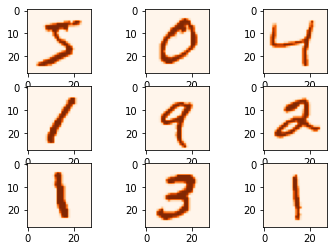

In [ ]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('Oranges'))
plt.show()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Normalizing

In [ ]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [ ]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(x_train.shape[0])

60000


In [ ]:
print((x_train.shape[1:]))

(28, 28)


In [ ]:
print(np.prod(x_train.shape[1:]))

784


In [ ]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
print(y_train)
print(y_train.shape)

[5 0 4 ... 5 6 8]
(60000,)


## One hot encoding the Target variable

In [ ]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 10)


# Neural Network Architecture

## 1. Basic Network with 1 Hidden Layer

In [ ]:
model1 = Sequential()

In [ ]:
model1.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model1.add(Dense(n_classes, activation = 'softmax'))

In [ ]:
model1.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*512 + 512

401920

In [ ]:
history = model1.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model1.evaluate(x_test, y_test, verbose=False)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.9584 - accuracy: 0.5343 - val_loss: 1.6220 - val_accuracy: 0.7198
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 1.3910 - accuracy: 0.7567 - val_loss: 1.1653 - val_accuracy: 0.7955
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 1.0410 - accuracy: 0.8069 - val_loss: 0.9009 - val_accuracy: 0.8297
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.8390 - accuracy: 0.8312 - val_loss: 0.7476 - val_accuracy: 0.8492
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.7173 - accuracy: 0.8449 - val_loss: 0.6501 - val_accuracy: 0.8615
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.6380 - accuracy: 0.8550 - val_loss: 0.5857 - val_accuracy: 0.8701
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5827 - accuracy: 0.8623 - val_loss: 0.5389 - val_accuracy: 0.8753
Epoch 

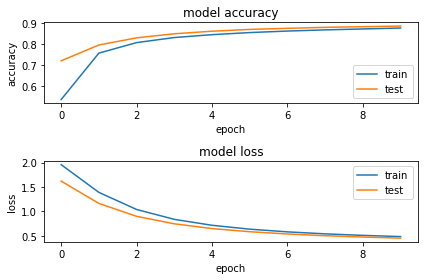

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [ ]:
loss_and_metrics = model1.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 3s - loss: 0.4749 - accuracy: 0.8777 - 3s/epoch - 1ms/step
Train Loss 0.4749339818954468
Train Accuracy 0.8776999711990356


In [ ]:
loss_and_metrics = model1.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.4544 - accuracy: 0.8861 - 508ms/epoch - 2ms/step
Test Loss 0.45444658398628235
Test Accuracy 0.8860999941825867


## 2. Network with 2 Hidden Layers

In [ ]:
model2= Sequential()

In [ ]:
model2.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model2.add(Dense(100, activation = 'sigmoid'))
model2.add(Dense(n_classes, activation = 'softmax'))
model2.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model2.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model2.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 2.2690 - accuracy: 0.2161 - val_loss: 2.2197 - val_accuracy: 0.3507
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 2.1743 - accuracy: 0.4565 - val_loss: 2.1183 - val_accuracy: 0.5022
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 2.0538 - accuracy: 0.5766 - val_loss: 1.9721 - val_accuracy: 0.6210
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 1.8824 - accuracy: 0.6340 - val_loss: 1.7706 - val_accuracy: 0.6790
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 1.6645 - accuracy: 0.6722 - val_loss: 1.5371 - val_accuracy: 0.7114
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 1.4353 - accuracy: 0.7090 - val_loss: 1.3151 - val_accuracy: 0.7332
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 1.2347 - accuracy: 0.7396 - val_loss: 1.1352 - val_accuracy: 0.7648
Epoch 

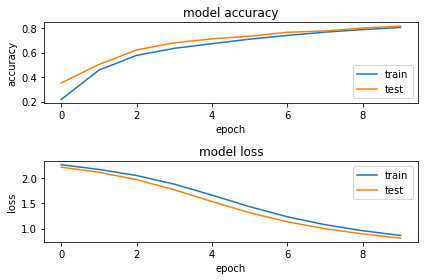

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [ ]:
loss_and_metrics = model2.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 3s - loss: 0.8250 - accuracy: 0.8109 - 3s/epoch - 1ms/step
Train Loss 0.8249685168266296
Train Accuracy 0.8109333515167236


In [ ]:
loss_and_metrics = model2.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 0s - loss: 0.8118 - accuracy: 0.8158 - 445ms/epoch - 1ms/step
Test Loss 0.8117652535438538
Test Accuracy 0.8158000111579895


## 3. Network with 3 Hidden Layers

In [ ]:
model3= Sequential()

In [ ]:
model3.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model3.add(Dense(100, activation = 'sigmoid'))
model3.add(Dense(100, activation = 'sigmoid'))
model3.add(Dense(n_classes, activation = 'softmax'))
model3.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 100)               51300     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 464,330
Trainable params: 464,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model3.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model3.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 2.3116 - accuracy: 0.1154 - val_loss: 2.2971 - val_accuracy: 0.1135
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 2.2954 - accuracy: 0.1189 - val_loss: 2.2932 - val_accuracy: 0.1152
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 2.2909 - accuracy: 0.1277 - val_loss: 2.2891 - val_accuracy: 0.1135
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 2.2860 - accuracy: 0.1275 - val_loss: 2.2825 - val_accuracy: 0.1135
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 2.2803 - accuracy: 0.1432 - val_loss: 2.2760 - val_accuracy: 0.1144
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 2.2733 - accuracy: 0.1717 - val_loss: 2.2682 - val_accuracy: 0.1342
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 2.2651 - accuracy: 0.2039 - val_loss: 2.2588 - val_accuracy: 0.2037
Epoch 

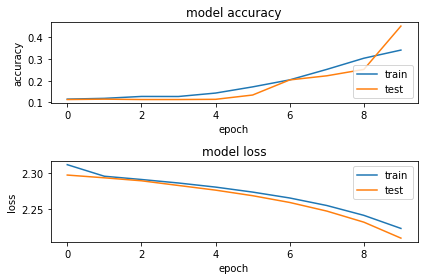

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [ ]:
loss_and_metrics = model3.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 3s - loss: 2.2108 - accuracy: 0.4395 - 3s/epoch - 1ms/step
Train Loss 2.210811138153076
Train Accuracy 0.43951666355133057


In [ ]:
loss_and_metrics = model3.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 2.2090 - accuracy: 0.4514 - 504ms/epoch - 2ms/step
Test Loss 2.2089970111846924
Test Accuracy 0.4514000117778778


## 4. Network with 2 layers and ReLU as an activation func for 1 layer

In [ ]:
model4= Sequential()

In [ ]:
model4.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(n_classes, activation = 'softmax'))
model4.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 100)               51300     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model4.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model4.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 1.8975 - accuracy: 0.5424 - val_loss: 1.4741 - val_accuracy: 0.6958
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 1.1580 - accuracy: 0.7593 - val_loss: 0.8847 - val_accuracy: 0.8088
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.7641 - accuracy: 0.8206 - val_loss: 0.6448 - val_accuracy: 0.8446
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5984 - accuracy: 0.8471 - val_loss: 0.5284 - val_accuracy: 0.8647
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5130 - accuracy: 0.8636 - val_loss: 0.4639 - val_accuracy: 0.8763
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4615 - accuracy: 0.8747 - val_loss: 0.4220 - val_accuracy: 0.8867
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4275 - accuracy: 0.8823 - val_loss: 0.3951 - val_accuracy: 0.8908
Epoch 

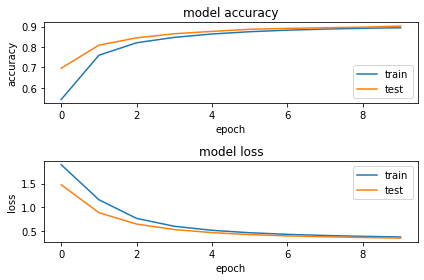

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [ ]:
loss_and_metrics = model4.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 3s - loss: 0.3643 - accuracy: 0.8968 - 3s/epoch - 1ms/step
Train Loss 0.36432331800460815
Train Accuracy 0.8968333601951599


In [ ]:
loss_and_metrics = model4.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 0s - loss: 0.3482 - accuracy: 0.9023 - 441ms/epoch - 1ms/step
Test Loss 0.34818360209465027
Test Accuracy 0.9023000001907349


## 5. Network with 2 layers and ReLU as an activation func for 1 layer and ADAM optimiser

In [ ]:
model5= Sequential()

In [ ]:
model5.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model5.add(Dense(100, activation = 'relu'))
model5.add(Dense(n_classes, activation = 'softmax'))
model5.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 100)               51300     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model5.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model5.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.4357 - accuracy: 0.8821 - val_loss: 0.2762 - val_accuracy: 0.9191
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2257 - accuracy: 0.9335 - val_loss: 0.1949 - val_accuracy: 0.9421
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1671 - accuracy: 0.9508 - val_loss: 0.1584 - val_accuracy: 0.9501
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1287 - accuracy: 0.9625 - val_loss: 0.1268 - val_accuracy: 0.9626
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1018 - accuracy: 0.9699 - val_loss: 0.1131 - val_accuracy: 0.9646
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0810 - accuracy: 0.9758 - val_loss: 0.0986 - val_accuracy: 0.9698
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0673 - accuracy: 0.9793 - val_loss: 0.0976 - val_accuracy: 0.9710
Epoch 

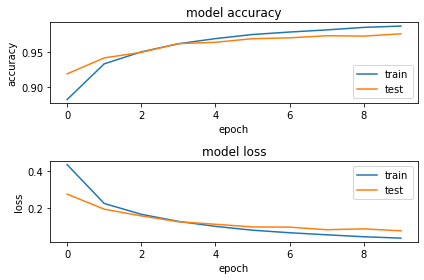

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [ ]:
loss_and_metrics = model5.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 3s - loss: 0.0311 - accuracy: 0.9910 - 3s/epoch - 2ms/step
Train Loss 0.031148038804531097
Train Accuracy 0.9909666776657104


In [ ]:
loss_and_metrics = model5.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 0s - loss: 0.0777 - accuracy: 0.9768 - 455ms/epoch - 1ms/step
Test Loss 0.07770291715860367
Test Accuracy 0.9768000245094299


## 6. Network with BatchNormalization

In [ ]:
model6= Sequential()

In [ ]:
model6.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model6.add(BatchNormalization())
model6.add(Dense(100, activation = 'relu'))
model6.add(BatchNormalization())
model6.add(Dense(n_classes, activation = 'softmax'))
model6.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_16 (Dense)            (None, 100)               51300     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 456,678
Trainable params: 455,454
Non-tr

In [ ]:
history = model6.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model6.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
469/469 [==============================] - 5s 8ms/step - loss: 0.2252 - accuracy: 0.9344 - val_loss: 0.1952 - val_accuracy: 0.9519
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1119 - accuracy: 0.9677 - val_loss: 0.0999 - val_accuracy: 0.9698
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0802 - accuracy: 0.9768 - val_loss: 0.0852 - val_accuracy: 0.9744
Epoch 4/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0629 - accuracy: 0.9817 - val_loss: 0.0801 - val_accuracy: 0.9755
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0513 - accuracy: 0.9845 - val_loss: 0.0755 - val_accuracy: 0.9757
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0822 - val_accuracy: 0.9747
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0352 - accuracy: 0.9888 - val_loss: 0.0752 - val_accuracy: 0.9744
Epoch 

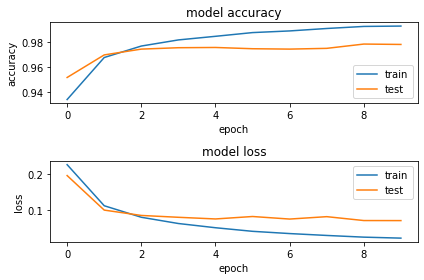

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [ ]:
loss_and_metrics = model6.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 3s - loss: 0.0135 - accuracy: 0.9962 - 3s/epoch - 2ms/step
Train Loss 0.013507287949323654
Train Accuracy 0.9961833357810974


In [ ]:
loss_and_metrics = model6.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 0s - loss: 0.0710 - accuracy: 0.9781 - 441ms/epoch - 1ms/step
Test Loss 0.07096682488918304
Test Accuracy 0.9781000018119812


## 7. Network with Dropout, L2 regularizer, kernel initializer

In [ ]:
model7= Sequential()

In [ ]:
model7.add(Dropout(0.2,input_shape=(784,)))
model7.add(Dense(512, activation= 'sigmoid',kernel_regularizer=l2(l=0.005),kernel_initializer='uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.5))
model7.add(Dense(100, activation = 'relu', kernel_regularizer=l2(l=0.005),kernel_initializer='uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.5))
model7.add(Dense(n_classes, activation = 'softmax'))
model7.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               51300     
                                                                 
 batch_normalization_3 (Batc  (None, 100)              400       
 hNormalization)                                      

In [ ]:
history = model7.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model7.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 1.2468 - accuracy: 0.8393 - val_loss: 0.7752 - val_accuracy: 0.9074
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.6588 - accuracy: 0.8798 - val_loss: 0.4487 - val_accuracy: 0.9375
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.6030 - accuracy: 0.8854 - val_loss: 0.4357 - val_accuracy: 0.9376
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.5973 - accuracy: 0.8878 - val_loss: 0.4523 - val_accuracy: 0.9309
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.6012 - accuracy: 0.8868 - val_loss: 0.4422 - val_accuracy: 0.9362
Epoch 6/10
469/469 [==============================] - 4s 10ms/step - loss: 0.5998 - accuracy: 0.8894 - val_loss: 0.4530 - val_accuracy: 0.9325
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.5977 - accuracy: 0.8899 - val_loss: 0.4359 - val_accuracy: 0.9410
E

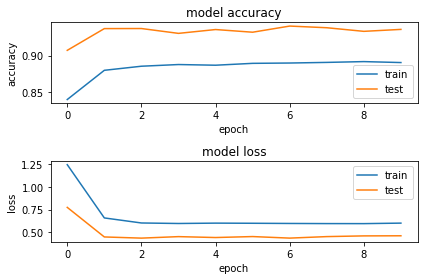

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [ ]:
loss_and_metrics = model7.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 3s - loss: 0.4610 - accuracy: 0.9372 - 3s/epoch - 2ms/step
Train Loss 0.46096372604370117
Train Accuracy 0.9372166395187378


In [ ]:
loss_and_metrics = model7.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.4616 - accuracy: 0.9364 - 653ms/epoch - 2ms/step
Test Loss 0.46162816882133484
Test Accuracy 0.9363999962806702
